# Homework #4: Computational Questions
*All computations should be done in this notebook using the R kernel. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work.*

#### You will be required to submit this notebook, fully compiled with your solutions, as an HTML or ipynb file to Canvas by 2pm on Friday, Feburary 16.

## Problem 1

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, there is empirical evidence that suggests that ``naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

#### Using ${\tt tax.txt}$, a dataset containing the taxable incomes for individuals in 1978, and the information given in theoretical problem 5, decide whether this dataset is fraudulent. 

[1] "This dataset does not follow a discrete uniform distribution given the graph below. I conclude that this dataset\nfollows the logarithmic distribution. The datapoints are not equally probable or distributed in an equal manner."

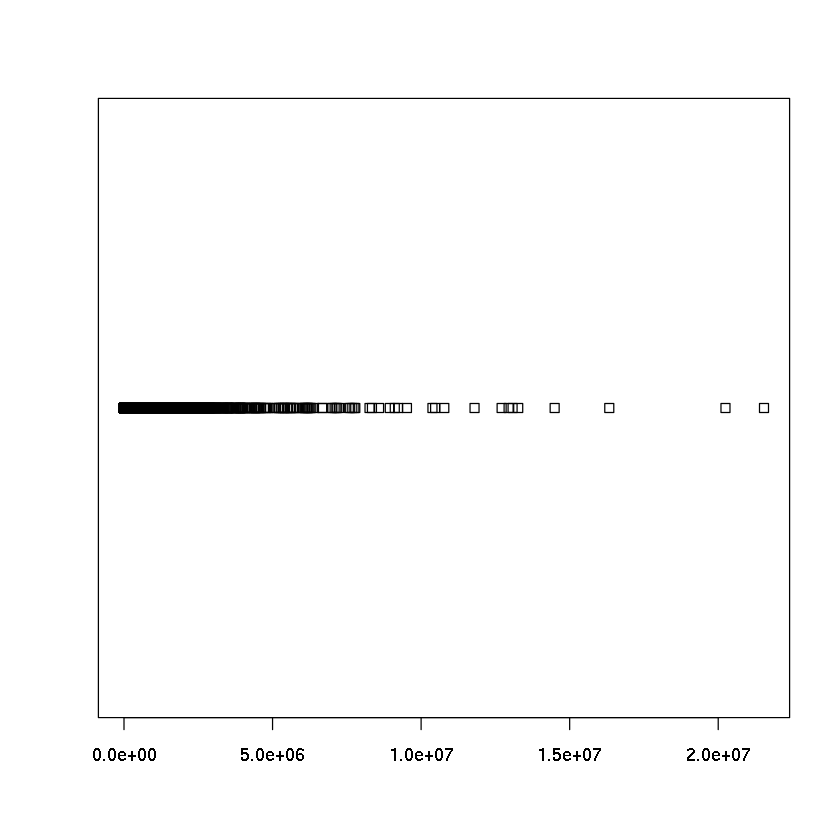

In [86]:
data = read.table("tax.txt")
plot(data)
"This dataset does not follow a discrete uniform distribution given the graph below. I conclude that this dataset
follows the logarithmic distribution. The datapoints are not equally probable or distributed in an equal manner."

## Problem 2

Consider the scenario from Unit #2 in-class code:

Imagine two unmarked bags filled with poker chips. Each bag contains both red poker chips and white poker chips. In bag one, there are 75% red and 25% white; in bag two, there are 75% white and 25% red. Imagine that you pick one bag at random, and, without looking inside, begin to draw chips out, one at a time, replacing and mixing after each draw, so that each draw is independent.


#### (a) Write a function called ${\tt draws}$, with one argument $n$, that randomly selects one of the two bags, and then generates a sample of size $n = 20$ from it (i.e., draws $n = 20$ chips, with replacement). Let 0 = "White" and 1 = "Red". Then, execute the line ${\tt e = draws(n)}$. The variable ${\tt e}$ will consist of a string of 1s and 0s, representing what happened as you drew chips. (HINT: The functions ${\tt rbinom()}$ and [${\tt switch()}$](https://www.datamentor.io/r-programming/switch-function) might be useful in randomly choosing the bag.)

In [87]:
draws = function(n) {
    bag = sample(c(1, 2), size = 1)
    if (bag == 1) {
        return (sample(c(0, 1), size = n, replace = TRUE, prob = c(0.25, 0.75)))
    }
    else {
        return (sample(c(0, 1), size = n, replace = TRUE, prob = c(0.75, 0.25)))
    }
}

n = 20

e = draws(n)
e

[1] 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1

Our goal for the rest of the question is to use Bayes' theorem to calculuate our degree of belief in the hypothesis $H$ = "We've selected bag one" given the evidence $e_i$ = "we've drawn $x$ red chips in $i$ draws", $i = 1,...,n$. Remember, Bayes' theorem is

$$P(H \, | \, e_i) = \frac{P(e_i \, | \, H)P_i(H)}{P(e_i \, | \, H)P_i(H) + P(e_i \, | \, H^c)P_i(H^c)}.$$

Achieving our goal will involve setting $P_i(H)$--the prior probability for $H$ at step $i$--equal to $P(H \, | \, e_{i-1})$--the posterior probability for $H$ from step $i-1$.

#### (b) Constuct an $n \times 2$ matrix $p$ where the $i^{th}$ entry of the first column contains $P(e_i \, | \, H)$ and the $i^{th}$ entry of the second column contains $P(e_i \, | \, H^c)$.  Note: These are binomial probabilities, and can be calculated--without a loop!--using ${\tt dbinom()}$ and  ${\tt cumsum()}$.  ${\tt cbind()}$ can help form that matrix.

In [88]:
"P(ei | H) = probability of drawn x red chips in i draws given we have selected bag 1"
"P(ei | Hc) = probaility of drawn x red chips in i draws given we have selected bag 2"

p = matrix(nrow = n, ncol = 2)

for (i in 1:n) {
    v1 = dbinom(c(1:i), size = i, prob = 0.75)
    v2 = dbinom(c(1:i), size = i, prob = 0.25)
    p[i,1] = mean(v1)
    p[i,2] = mean(v2)
}

p

[1] "P(ei | H) = probability of drawn x red chips in i draws given we have selected bag 1"

[1] "P(ei | Hc) = probaility of drawn x red chips in i draws given we have selected bag 2"

0.75000000,0.25000000
0.46875000,0.21875000
0.32812500,0.19270833
0.24902344,0.17089844
0.19980469,0.15253906
0.16662598,0.13700358
0.14284842,0.12378802
0.12499809,0.11248589
0.11111069,0.10276837
0.09999990,0.09436865
0.09090907,0.08706953


#### (c) Create an $n \times 2$ matrix ${\tt prior}$ that has 0.5 in the (1,1) and (1,2) entry, and NA everywhere else (for now). This is where we'll store $P_i(H)$ and $P_i(H^c)$ for every step. 

In [89]:
prior = matrix(NA, nrow = n, ncol = 2)
prior[1, 1] = 0.5
prior[1, 2] = 0.5
prior

0.5,0.5
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA


#### (d) Create an $n \times 1$ vector ${\tt post}$  with NAs everywhere. This is where we'll store $P(H \, | \, e_i)$, the posterior probability for $H$ at every step.

In [90]:
post = matrix(NA, nrow = n, ncol = 1)
post

NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA


#### (e) Use the function below to calculate the posterior probability for the first step, i.e., after pulling one chip. Store this in ${\tt post[1]}$. 

In [91]:
posterior = function(p, prior, i){
    #p is a vector of size 2, with likelihoods for each bag
    #prior is a vector of size 2, with priors for each bag
    post = p[i] * prior[i] / (p[i] * prior[i] + p[i,2] * prior[i,2])
    return(post)
}

post[1] = posterior(p, prior, 1)
post[1]

[1] 0.75

#### (f) In the loop below, add two lines of code. The first line should use the posterior probability from the $(i-1)$ step to store $P_i(H)$ and $P_i(H^c)$ in ${\tt prior}$ for the $i^{th}$ step. The second line should calculate the posterior probability for the $i^{th}$ step (using the ${\tt posterior}$ function above).

In [92]:
for (i in 2:n){
    prior[i,1] = posterior(p, prior, i - 1)
    prior[i,2] = (1 - posterior(p, prior, i - 1))
    post[i] = posterior(p, prior, i)
}

prior

0.5000000,0.50000000
0.7500000,0.25000000
0.8653846,0.13461538
0.9162896,0.08371041
0.9410023,0.05899772
0.9543212,0.04567879
0.9621344,0.03786561
0.9670202,0.03297979
0.9702232,0.02977684
0.9723971,0.02760287
0.9739110,0.02608903


#### (g) Use ${\tt data.frame()}$ to construct a table containing, at each step $i = 1,...,n$,  the posterior distribution, $P(H \, | \, e_i)$, the likelihood $P(e_i \, | \, H)$, and the prior $P_i(H)$. Then, construct a plot of the posterior probability against $i$, for $i = 1,...,n$. 

p...1.,p...2.,prior...1.
0.75000000,0.25000000,0.5000000
0.46875000,0.21875000,0.7500000
0.32812500,0.19270833,0.8653846
0.24902344,0.17089844,0.9162896
0.19980469,0.15253906,0.9410023
0.16662598,0.13700358,0.9543212
0.14284842,0.12378802,0.9621344
0.12499809,0.11248589,0.9670202
0.11111069,0.10276837,0.9702232
0.09999990,0.09436865,0.9723971


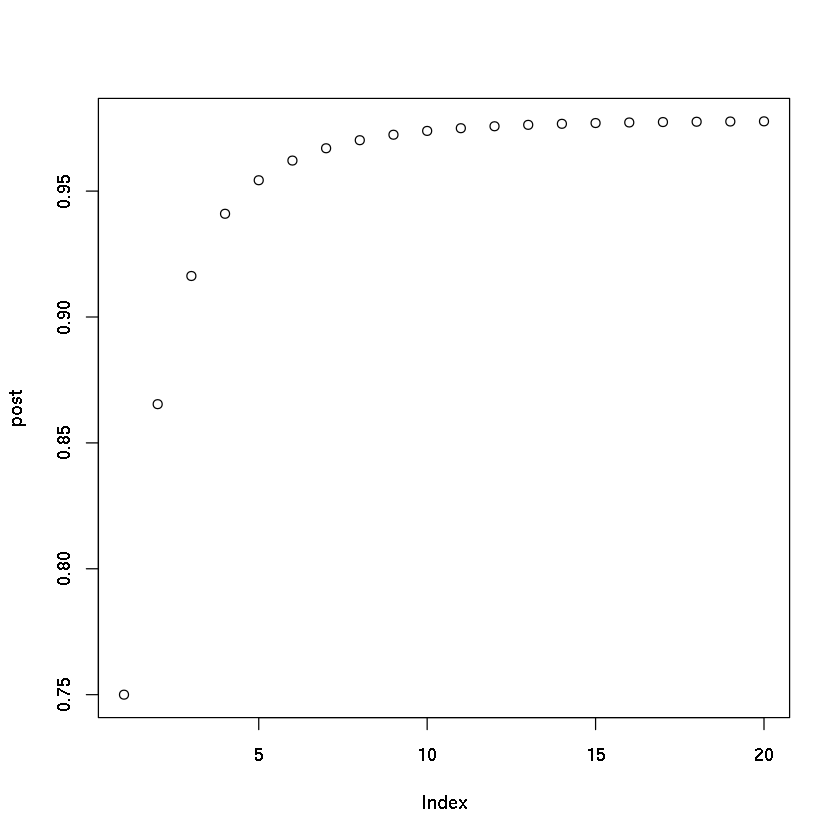

In [93]:
table = data.frame(p[,1], p[,2], prior[,1])
table
plot(post)

#### (h) After $n = 25$ draws, what do you believe about $H$? Based on your table and plot, how many chips did you need to draw before you became basically certain about the truth or falsity of $H$?

In [94]:
"After 25 draws it is basically certain that we have chosen from bag one. The plot suggests that after 15 draws we can be completely certain about the truth or falsity of H."

[1] "After 25 draws it is basically certain that we have chosen from bag one. The plot suggests that after 15 draws we can be completely certain about the truth or falsity of H."